In [1]:
import os
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [6]:
# Пути к изображениям и меткам датасета xd_n.v1i.

path_to_data_val_img = "xd_n.v1i/test/images/"

val_images_list = os.listdir(path_to_data_val_img)

path_to_data_val_lbl = "xd_n.v1i/test/labels/"

val_labels_list = os.listdir(path_to_data_val_lbl)

In [7]:
print(val_images_list[:5])
print()
print(val_labels_list[:5])

['0_-33-_jpg.rf.b6383119cb5283a29fadd70a3c547379.jpg', '0_-44-_jpg.rf.27f4b44d5bebb335b6ea91dcdac7759a.jpg', '1024_jpg.rf.4dd60d62e26bca30b10e6439e8b60289.jpg', '1039_jpg.rf.40138ede848236ed69b1799b583a5453.jpg', '1078_jpg.rf.ce957ee7617afe39ea2c53f77a3ee050.jpg']

['0_-33-_jpg.rf.b6383119cb5283a29fadd70a3c547379.txt', '0_-44-_jpg.rf.27f4b44d5bebb335b6ea91dcdac7759a.txt', '1024_jpg.rf.4dd60d62e26bca30b10e6439e8b60289.txt', '1039_jpg.rf.40138ede848236ed69b1799b583a5453.txt', '1078_jpg.rf.ce957ee7617afe39ea2c53f77a3ee050.txt']


In [8]:
# Функция для выбора класса по кариесу и перевода координат из COCO формата в человеческий. 
def compute_coordinates(file_name, file_name_image):
    
    coordinates_list = []
    im = Image.open(path_to_data_val_img + file_name_image)
    image_width, image_height = im.size

    with open(file_name, "r") as file:
        
        # итерация по строкам текстового файла
        for line in file:
            coordinates = line.strip().split()
            if coordinates[0] == "0":
                coordinates = coordinates[1:]
                coordinates[0] = float(coordinates[0])*image_width
                coordinates[1] = float(coordinates[1])*image_height
                coordinates[2] = float(coordinates[2])*image_width
                coordinates[3] = float(coordinates[3])*image_height
                
                
                coordinates[0] = coordinates[0] - coordinates[2]/2
                coordinates[1] = coordinates[1] - coordinates[3]/2
            
                print(coordinates)
                coordinates_list.append(coordinates)
            
    file.close       
    
    return coordinates_list


# Функция для отрисовки баундинг боксов на изображениях. Нам нужно сделать наложение чтобы посмотреть качество разметки.
def draw_bbox(image_fullname, image_name, coord):
    
    im = Image.open(image_fullname)
    img = cv2.imread(image_fullname,1) 

    if len(coord) != 0:
               
        fig, ax = plt.subplots()
        ax.imshow(im)

        for box in coord:
            rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
            cv2.rectangle(img, (int(box[0]), int(box[1])), ( int(box[0] + box[2]), int(box[1] + box[3])), (0, 0, 255), 2) 
            ax.add_patch(rect)
            
        cv2.imwrite("xd_n.v1i/test/images_box/" + image_name, img)
        plt.show()
    
    else:
        pass          

[116.0, 70.5, 14.999999999999998, 13.0]
[353.5, 106.5, 16.0, 10.0]
[133.5, 104.5, 14.999999999999998, 21.0]


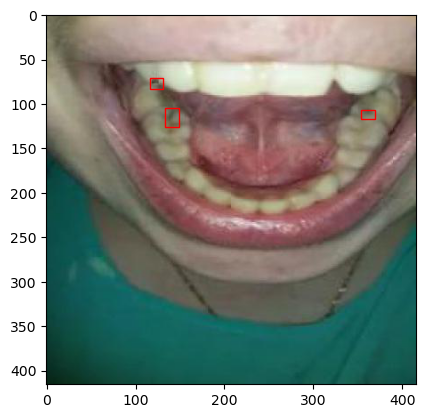

[335.0, 237.49999999999997, 17.0, 18.0]
[216.5, 291.5, 26.0, 14.999999999999998]
[324.0, 27.5, 23.0, 22.0]
[320.0, 73.5, 27.000000000000004, 22.0]


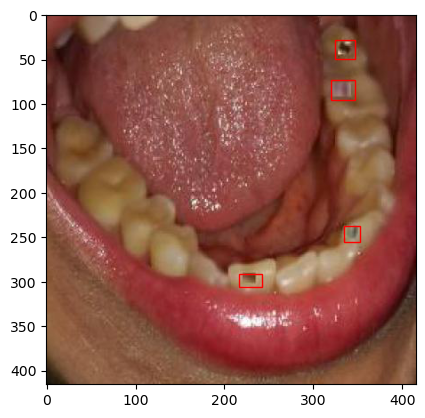

[378.5, 180.5, 36.0, 32.0]
[394.71500000000003, 226.285, 18.55, 21.85]


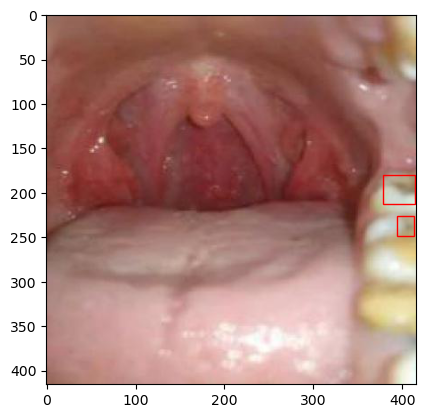

[114.0, 162.0, 20.0, 20.0]
[308.0, 282.0, 18.0, 19.0]


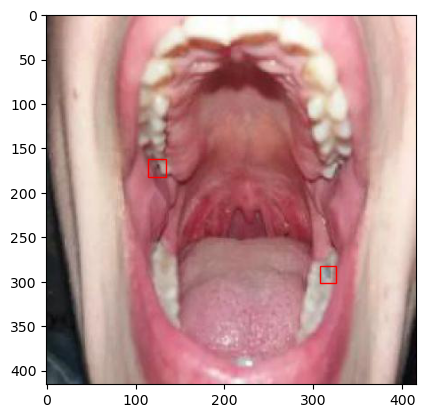

[284.5, 209.0, 26.0, 22.0]


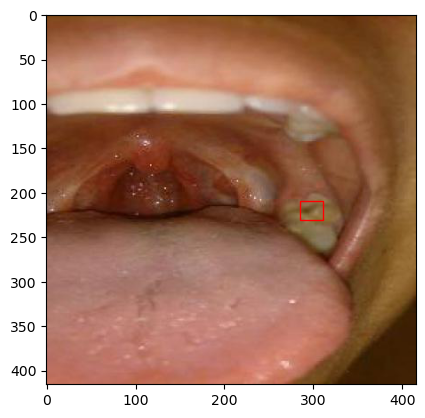

[29.0, 50.0, 26.0, 34.0]
[393.13, 32.605, 17.92, 21.09]


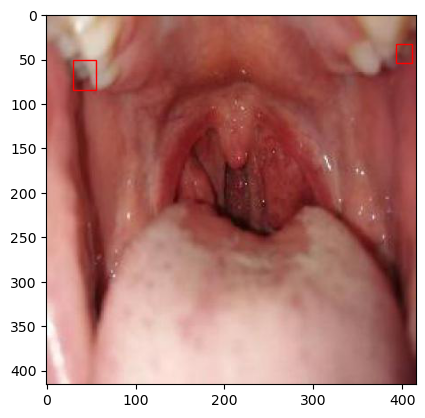

[356.5, 286.0, 19.0, 27.000000000000004]


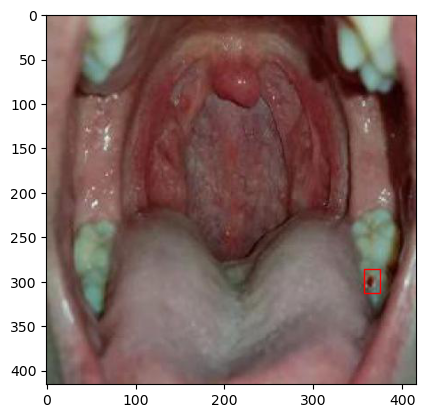

[0.0, 156.0, 20.0, 29.0]
[291.025, 196.29, 18.99, 17.6]
[295.76500000000004, 218.925, 28.049999999999997, 14.85]


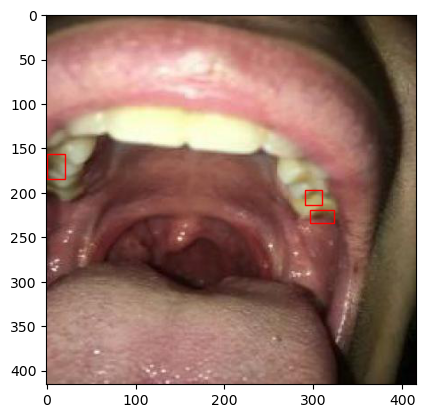

[338.0, 82.5, 13.0, 19.0]


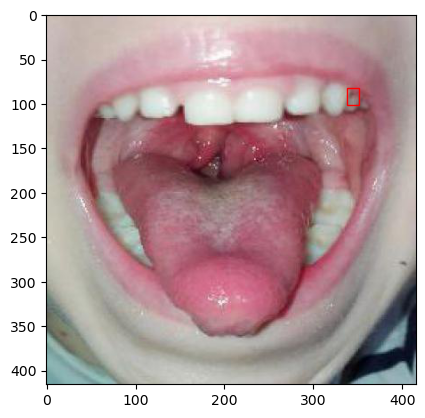

[348.5, 237.0, 24.0, 24.0]
[288.0, 307.5, 34.0, 20.0]


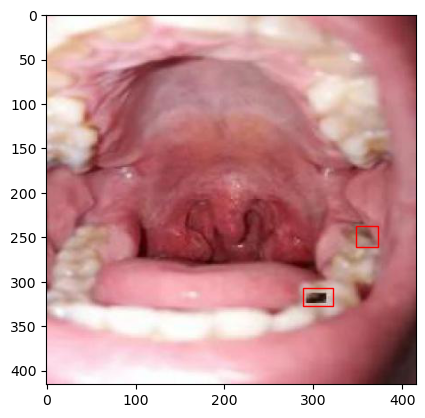

[88.5, 160.0, 14.0, 17.0]


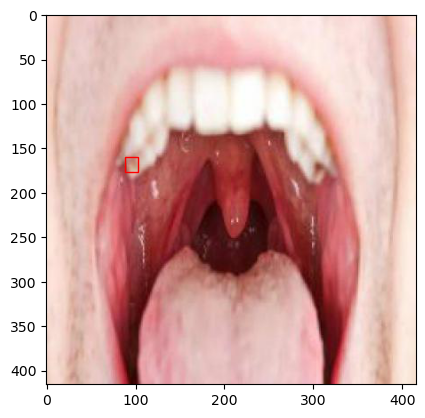

[296.0, 121.50000000000001, 11.0, 12.0]
[79.975, 153.66000000000003, 9.75, 13.28]
[278.395, 99.98000000000002, 13.95, 12.82]


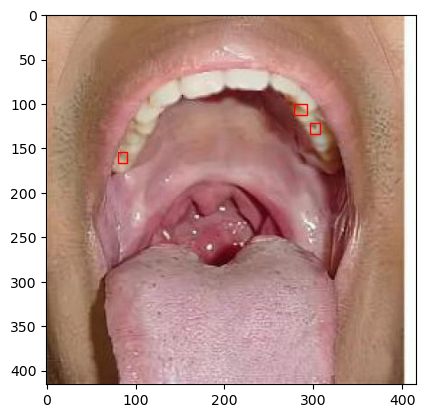

[80.0, 180.5, 16.0, 14.999999999999998]


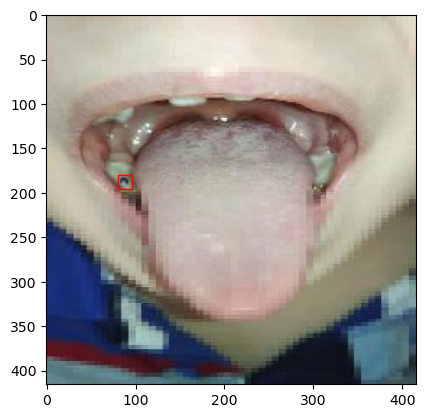

[281.0, 223.5, 16.0, 19.0]
[192.0, 153.0, 16.0, 13.0]


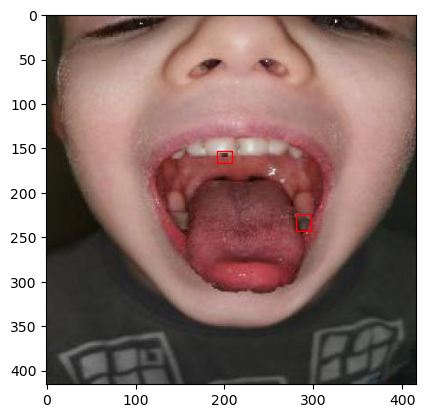

[302.0, 208.5, 13.0, 14.0]
[95.24000000000001, 208.39500000000004, 14.36, 17.09]


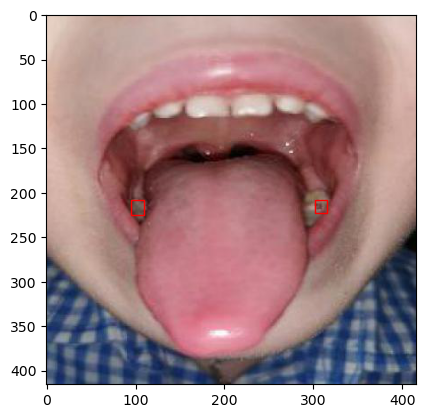

[153.0, 273.5, 16.0, 11.0]
[324.19, 270.505, 15.64, 20.17]


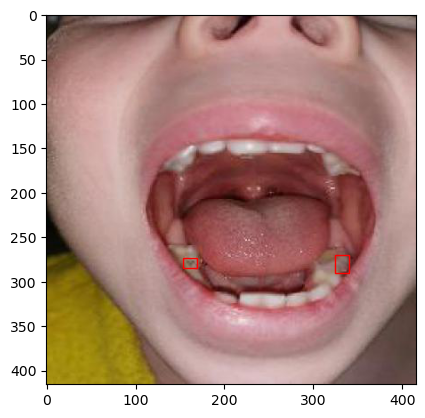

[51.5, 227.5, 29.999999999999996, 33.0]
[349.45, 183.65499999999997, 20.2, 17.53]
[353.13, 210.505, 11.54, 26.590000000000003]


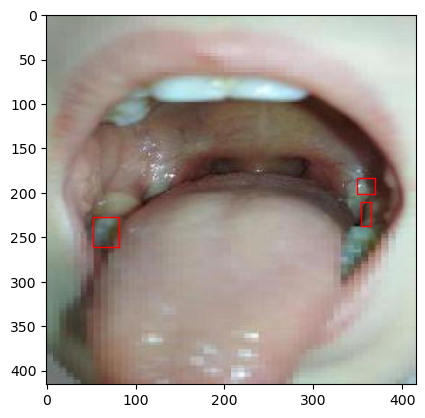

[183.0, 83.0, 32.0, 18.0]
[62.605000000000004, 102.605, 16.07, 13.51]


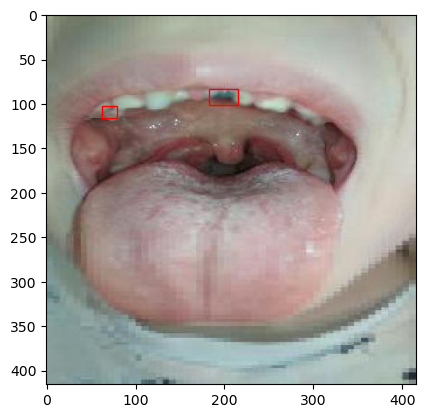

[158.0, 319.0, 11.0, 17.0]
[129.37, 291.0, 8.38, 10.72]


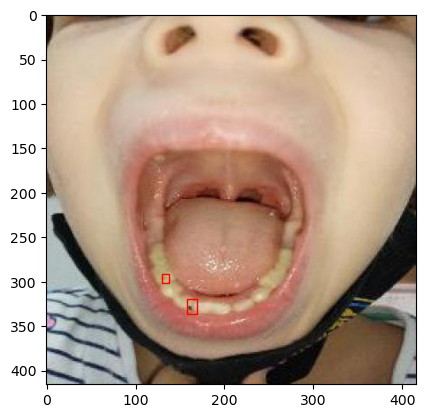

[47.49999999999999, 16.0, 18.0, 20.0]


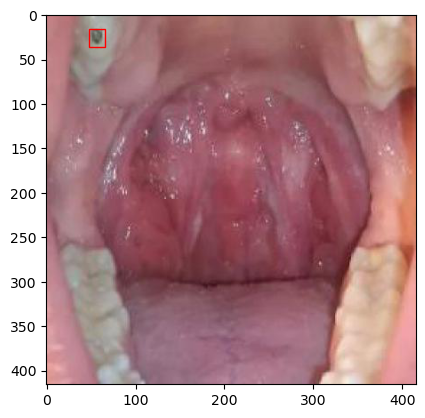

[139.5, 115.0, 16.0, 14.0]


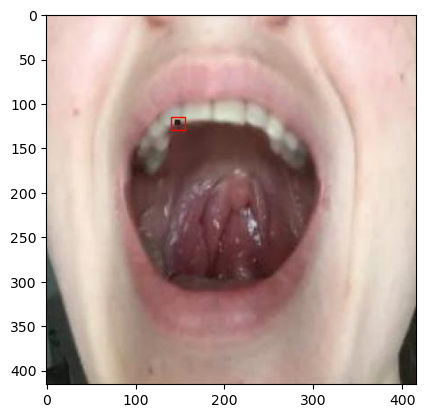

[265.0, 165.0, 20.0, 12.0]
[22.5, 138.5, 33.0, 27.000000000000004]


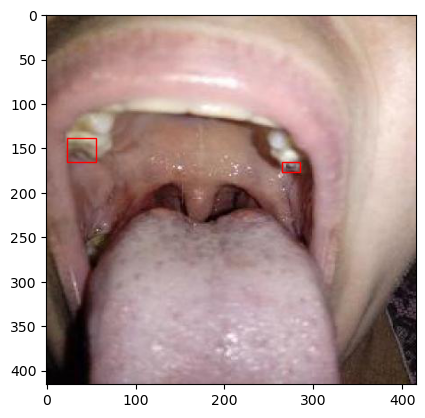

[384.5, 123.5, 20.0, 19.0]


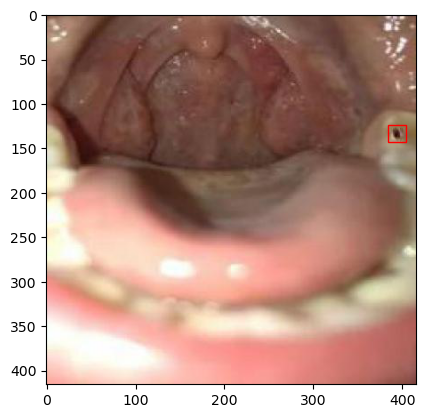

[257.0, 125.0, 44.0, 24.0]


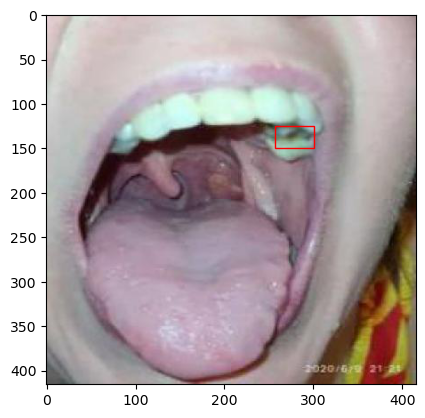

[59.5, 206.5, 29.0, 36.0]
[332.0, 250.0, 23.0, 39.0]
[53.0, 71.5, 19.0, 24.0]


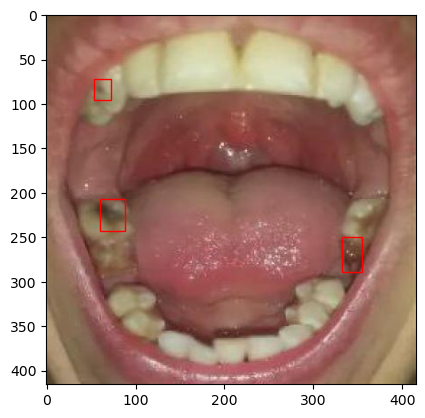

[379.5, 310.0, 21.0, 21.0]


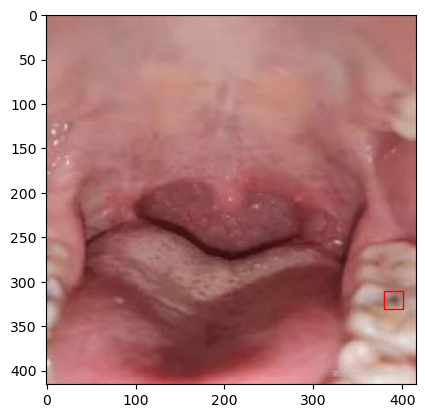

[118.5, 152.5, 28.0, 14.999999999999998]
[298.4, 155.235, 9.96, 10.59]


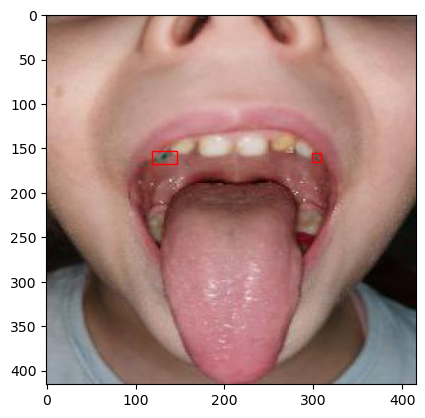

[29.0, 45.5, 23.0, 19.0]
[18.400000000000002, 35.765, 10.04, 13.51]
[364.71000000000004, 197.86499999999995, 18.18, 38.67]
[371.02500000000003, 68.4, 20.15, 28.380000000000003]


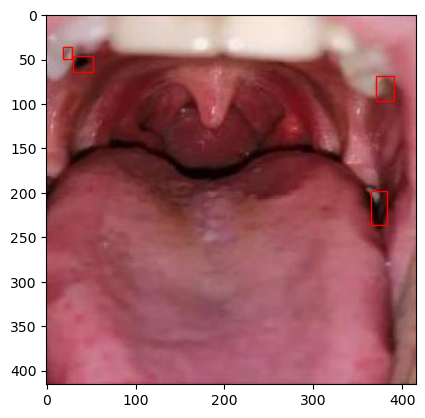

[141.0, 231.0, 19.0, 14.0]


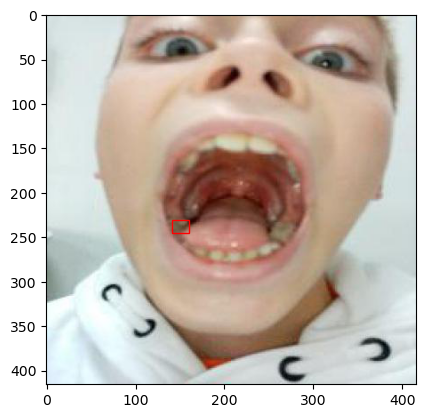

[131.5, 154.0, 25.0, 19.0]
[277.87, 154.18, 15.58, 9.44]
[292.07500000000005, 237.865, 8.55, 13.030000000000001]
[157.345, 248.91500000000005, 16.85, 10.27]


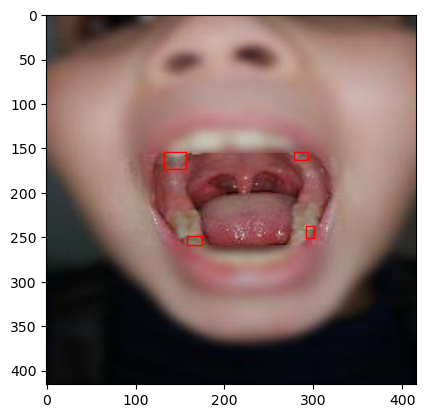

In [9]:
# Пройдемся по всем файлам с разметкой.
# Изображения могут иметь разный формат, это тоже учтём.

for file_name in val_labels_list:
    file_name_jpg = file_name[:file_name.find(".txt")] + ".jpg"
    file_name_jpeg = file_name[:file_name.find(".txt")] + ".jpeg"
    
    if file_name_jpg in val_images_list:        
        file_name_image = file_name_jpg
        
    elif file_name_jpeg in val_images_list:        
        file_name_image = file_name_jpeg
    
    else:
        file_name_image = ""
        
    if file_name_image != "":
        coordinates_list = compute_coordinates(path_to_data_val_lbl + file_name, file_name_image)

        draw_bbox(path_to_data_val_img + file_name_image, file_name_image, coordinates_list) 
        
    else:
        pass
    